### Emerging Technologies Project 2020/21
**Charlie Conneely, G00348887**
***
**Task**: Build a model based off of the `powerproduction` dataset, which can be used to predict power values based on input speed values. 

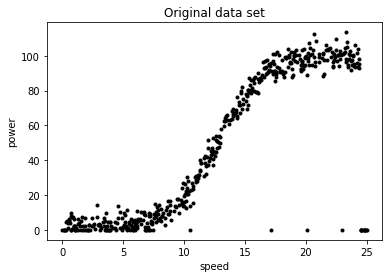

In [35]:
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Parsing
import pandas as pd

# Linear regression
import sklearn.linear_model as lm

dataset = pd.read_csv("powerproduction.txt")

plt.title('Original data set')
plt.xlabel('speed')
plt.ylabel('power')
plt.plot(dataset.values[:,0], dataset.values[:,1], 'k.')
plt.show()

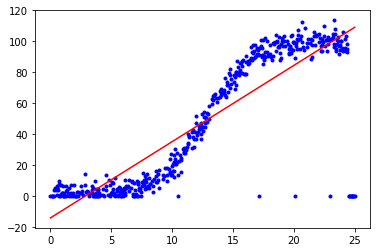

In [38]:
x = dataset.values[:,0].reshape(-1, 1)
y = dataset.values[:,1].reshape(-1, 1)

model = lm.LinearRegression()
model.fit(x,y)

line = model.predict(x)
plt.plot(x, y, 'b.')
plt.plot(x, line, color='red')
plt.show()

In [55]:
# We can now make general predictions using this linear model
model.predict(11.2)

array([[41.17716882]])